# Lecture 7 - Observational Data: Different Sampling Schemes

## Today's Learning Objectives

1. Introduce the use of different sampling schemes in observational studies.
2. Illustrate the concept of the proxy ground truth to assess different sampling schemes.
3. Apply complete simulation studies to a given sampling scheme via the proxy ground truth.
4. Explore the efficiency of the Case-Control sampling scheme via a modified power analysis.

## Loading `R` Packages

In [1]:
options(repr.matrix.max.rows = 8, repr.matrix.max.cols = 10)
library(foreign)
library(tidyverse)
library(broom)
library(reshape2)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘reshape2’




The following object is masked from ‘package:tidyr’:

    smiths




## Previously...

We introduced **observational studies** to **assess causality** between a variable $X$ and a response $Y$. Moreover, we highlighted that observational studies are used when randomized experimentation is infeasible. Hence, an observational study would try to make the best for data involving $X$, $Y$, and $p$ confounders $C_j$ ($i = 1, \dots, p$).

In {doc}`lecture6_obs_stratifying_modelling`, we reviewed a case study that followed two strategies:

1. **Stratum-specific causal inference with multiple confounders.** We **stratified** our data according to the confounders $C_j$ to see how $X$ and $Y$ are related (primarily in a causation framework) within homogeneous strata. However, we encountered different estimation problems while following this approach **since not all strata had sufficient absolute frequencies by cell in their respective contingency tables**.
2. **Overall Model-Based Causal Inference.** We pursued an overall model-based causal inference which is basically a regression of $Y$ using $X$ and $C_{1}, \ldots, C_{p}$ as regressors. This approach proved to be more effective since we controlled for the possible confounders in our model. Therefore, we assumed that no matter what confounders a population of interest had as long as we control them in our **regression's systematic component**, all subjects would have the same effect of $X$ over $Y$.

Recall the overall model-based causal inference required three fundamental assumptions:

1. No interactions between strata, which implies a simple/smooth structure in how $Y$ varies across strata (i.e., not including all possible interactions between the $p$ confounders **at any degree**).
2. No interactions involving $X$ and any confounder $C_j$, which implies that the strength of the $(X, Y)$ association within strata **does not vary across strata**.
3. Have we captured all confounders in our selection of $C_{1}, \ldots, C_{p}$? **A challenging assumption to fulfill!**

As we can see, we have already seen **causal analysis** in observational studies. Therefore, it is time to check **causal design** in observational studies.

## 1. Sampling Schemes in Observational Studies 

We will build on what we did in {doc}`lecture6_obs_stratifying_modelling` by looking at different sampling schemes for observational data. 

```{attention}
This is an important lecture since this is the first time we dig deeper into the field of **statistical sampling**.
```

As in randomized experiments (i.e., non-blocking versus blocking), there are different ways we can gather our data in observational studies. Mainly, we must explore how to select our sample before executing the study. Moreover, **our subsequent statistical analysis needs to account for how we sample our data**.

### 1.1. Sampling Assessment Via the Ground Truth

Besides evaluating our statistical modelling (as we did via the three assumptions we explored in {doc}`lecture6_obs_stratifying_modelling`, **we also need to assess any given sampling scheme before executing it**. 

**Nonetheless, how are we supposed to evaluate these schemes?** We need to introduce a new concept to explain this matter. It is called the **ground truth**.

```{important}
In Statistics and Machine Learning, the **ground truth** implicates checking the results of any given approach (e.g., a sampling scheme and its corresponding statistical model in the form of regression) in terms of its estimation accuracy against the **real-world**.
```

Nevertheless, assessing our methods in statistical inference is challenging because we do not have a concrete **ground truth**! **Under the frequentist paradigm**, since we **DO NOT** have access to the population data, we only rely on a sample (hopefully representative!) which we use to estimate fixed population parameters. Hence, the **ground truth** will not be available!

Not having access to the **ground truth** will be especially problematic if we want to infer something more complex than variable association, i.e., we would like to infer causality between $X$ and $Y$. However, we are now familiar with a powerful tool to build a **proxy** of the **ground truth**: **simulation**.

### 1.2. Simulation: A Proxy of the Ground Truth

We have been using basic Monte Carlo simulation throughout this block. However, we will use a more sophisticated simulation technique throughout this lecture. The core ideas of this technique are the following:

1. **Use a relevant sample dataset.** This step assumes a **previous sample dataset** as representative enough of our population of interest. Ideally, we want our sampling methods to work on data with the typical characteristics of this population.
2. **Fit a model.** We will use the relevant sample dataset to fit a model of the response $Y$ versus the variable $X$ and a determined set of confounders $C_j$ (**as strata**).
3. **Simulate a proxy ground truth.** This step will use the model from **step 2** to simulate new outcomes $Y$. Basically, we would keep the same regressors' ranges since we are using their corresponding fitted model to simulate new observations. These are the typical ranges we would encounter in real population data.

```{attention}
The previous steps will use the three assumptions from {doc}`lecture6_obs_stratifying_modelling` in two ways: 

- The first way will come in **step 2** since we will have to use the model we concluded was the "best one" ($Y$, $X$, and a given set of confounders as strata). 
- The second way will use these assumptions when generating new data in **step 3** via the model from **step 2**.
```

```{exercise}
:label: lecture7-q1

**Answer TRUE or FALSE:**

We could visualize the previous process of building a proxy ground truth as **a modified bootstrapping taken to a higher level**.

**A.** TRUE

**B.** FALSE
```

## 2. The Western Collaborative Group Study Data

We will retake the Western Collaborative Group Study (WCGS) data to illustrate the previously defined three-step process. The WCGS data is a **prospective cohort study** that recruited **middle-aged men between the ages of 39 and 59 who were employees of ten Californian companies**. The data was collected on 3154 subjects between 1960 and 1961.

```{caution}
Before continuing with our three-step process to build a proxy for the **ground truth**, we need to clarify that we will use it as representative data from our population of interest.
```

### 2.1. Step 1: Use a Relevant Sample Dataset

We initially load our data. Then, we will eliminate those rows with missing data via `na.omit()` (missing data will again not be the scope of today's lecture!). We end up with $3,101$ subjects.

In [2]:
wcgs <- as_tibble(read.dta("../data/wcgs.dta"))
wcgs <- na.omit(wcgs)
wcgs

age,arcus,behpat,bmi,chd69,⋯,typchd69,uni,weight,wghtcat,agec
<int>,<int>,<fct>,<dbl>,<fct>,⋯,<int>,<dbl>,<int>,<fct>,<fct>
50,1,A1,31.32101,No,⋯,0,0.4860738,200,170-200,46-50
51,0,A1,25.32858,No,⋯,0,0.1859543,192,170-200,51-55
59,1,A1,28.69388,No,⋯,0,0.7277991,200,170-200,56-60
51,1,A1,22.14871,No,⋯,0,0.6244636,150,140-170,51-55
⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮
41,0,B4,25.03378,No,⋯,0,0.27816987,195,170-200,41-45
53,0,B4,25.79944,No,⋯,0,0.95139700,185,170-200,51-55
54,0,B4,23.49076,No,⋯,0,0.57082593,150,140-170,51-55
48,0,B4,30.26990,No,⋯,0,0.08677829,205,> 200,46-50


The three assumptions from {doc}`lecture6_obs_stratifying_modelling` will come into play in this part. **Suppose** the following model was the "best one" (note `age`, `bmi`, `smoke`, and `chol` are used as strata):

```
glm(chd69 ~ dibpat + age_bins + smoke + bmi_bins + chol_bins, family = "binomial", data = wcgs)
```

Thus, we select the following variables from `wcgs`:

- `dibpat`: Dichotomous behaviour pattern, a factor-type variable with two levels (`Type A` and `Type B`).
- `age`: Subject's age in years (a count-type variable).
- `bmi`: Subject's body mass index (BMI) in $\text{kg}/\text{m}^2$ (a continuous-type variable).
- `chol`: Subject's cholesterol levels in $\text{mg}/100 \text{ ml}$ (a continuous-type variable).
- `smoke`: Whether the subject smokes or not, a factor-type variable with two levels (`Yes` and `No`).
- `chd69`: Whether the subject experienced a coronary heart disease (CHD) event, a factor-type variable with two levels (`Yes` and `No`).

In [3]:
wcgs <- wcgs %>%
  select(dibpat, age, bmi, chol, smoke, chd69)

Recall the main statistical inquiry of this **causal model**:

> **Does a `Type A` behaviour pattern (`dibpat`) LEAD to a coronary heart disease (CHD) event (`chd69`)?**

From [Brand et al. (1976)](https://www.ahajournals.org/doi/pdf/10.1161/01.CIR.53.2.348), the levels of `dibpat` are defined as follows:

> *Methods for the assessment of the dichotomous behavior pattern by a structured psychological interview in the
WCGS have been described elsewhere. **Type A** behavior is characterized by enhanced aggressiveness and competitive drive, preoccupation with deadlines, and chronic impatience and sense of time urgency, in contrast with the more relaxed and less hurried **Type B** behavior pattern.*

Therefore $Y$ will be `chd69` and $X$ will be `dibpat`, whereas `age`, `bmi`, `chol` and `smoke` will be confounders in the proxy of the **ground truth**.

Given the form of the model

```
glm(chd69 ~ dibpat + age_bins + smoke + bmi_bins + chol_bins, family = "binomial", data = wcgs)
```

we need to create strata by confounder (**except for `smoke` which is already categorical**). These strata will be formed on a quartile basis.

In [4]:
wcgs <- wcgs %>%
  mutate(
    age_bins = cut(age, breaks = c(min(age), quantile(age, (1:3) / 4), max(age)), include.lowest = TRUE),
    bmi_bins = cut(bmi, breaks = c(min(bmi), quantile(bmi, (1:3) / 4), max(bmi)), include.lowest = TRUE),
    chol_bins = cut(chol, breaks = c(min(chol), quantile(chol, (1:3) / 4), max(chol)), include.lowest = TRUE)
  )
wcgs

dibpat,age,bmi,chol,smoke,chd69,age_bins,bmi_bins,chol_bins
<fct>,<int>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
Type A,50,31.32101,249,Yes,No,"(45,50]","(25.8,38.9]","(223,253]"
Type A,51,25.32858,194,Yes,No,"(50,59]","(24.4,25.8]","[103,197]"
Type A,59,28.69388,258,No,No,"(50,59]","(25.8,38.9]","(253,645]"
Type A,51,22.14871,173,No,No,"(50,59]","[11.2,23]","[103,197]"
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Type B,41,25.03378,180,No,No,"[39,42]","(24.4,25.8]","[103,197]"
Type B,53,25.79944,167,No,No,"(50,59]","(24.4,25.8]","[103,197]"
Type B,54,23.49076,242,Yes,No,"(50,59]","(23,24.4]","(223,253]"
Type B,48,30.26990,288,No,No,"(45,50]","(25.8,38.9]","(253,645]"


Once we have all variables ready, we construct a **simulated population** called `sim_pop`. This population is based on the fact everyone in dataset `wcgs` contributes with twenty clones (in terms of  $X$ and $C_j$s). **We shuffle all rows at the end for subsequent sampling purposes.**

```{attention}
Note we are not using $Y$ (`ch69`) to make these clones. We will construct $Y$ in `step 2`.
```

In [5]:
set.seed(554) # Reproducibility

sim_pop <- data.frame(
  dibpat = rep(wcgs$dibpat, each = 20),
  age_bins = rep(wcgs$age_bins, each = 20),
  smoke = rep(wcgs$smoke, each = 20),
  bmi_bins = rep(wcgs$bmi_bins, each = 20),
  chol_bins = rep(wcgs$chol_bins, each = 20)
)
# Shuffling rows!
rows <- sample(nrow(sim_pop))
sim_pop <- sim_pop[rows, ]
sim_pop

,dibpat,age_bins,smoke,bmi_bins,chol_bins
,<fct>,<fct>,<fct>,<fct>,<fct>
46844,Type B,"[39,42]",No,"(24.4,25.8]","(197,223]"
36954,Type B,"(50,59]",No,"(25.8,38.9]","[103,197]"
47173,Type B,"(42,45]",No,"(23,24.4]","[103,197]"
44779,Type B,"(50,59]",No,"(23,24.4]","(197,223]"
⋮,⋮,⋮,⋮,⋮,⋮
13998,Type A,"(42,45]",No,"(25.8,38.9]","[103,197]"
43487,Type B,"[39,42]",No,"[11.2,23]","[103,197]"
14393,Type A,"(42,45]",Yes,"(25.8,38.9]","[103,197]"
45693,Type B,"(50,59]",Yes,"(25.8,38.9]","[103,197]"


### 2.2. Step 2: Fit a Model

Now, **using the sample in `wcgs`**, we will fit a **Binary Logistic regression** as follows:

In [6]:
wcgs_bin_log_model <- glm(chd69 ~ dibpat + age_bins + smoke + bmi_bins + chol_bins,
  family = "binomial", data = wcgs
)

**To mimic the variable structure of the actual dataset `wcgs` into `sim_pop`**, we will use the estimated regression coefficients from `wcgs_bin_log_model` to set the "true" relationship between the $Y$ (`chd69`) and the $X$ (`dibpat`) along with the confounders as strata.

In [7]:
wcgs_coef_pop <- coef(wcgs_bin_log_model)
round(wcgs_coef_pop, 2)

(Intercept)        dibpatType A     age_bins(42,45]     age_bins(45,50] 
              -4.83                0.72                0.16                0.63 
    age_bins(50,59]            smokeYes   bmi_bins(23,24.4] bmi_bins(24.4,25.8] 
               0.94                0.64                0.33                0.48 
bmi_bins(25.8,38.9]  chol_bins(197,223]  chol_bins(223,253]  chol_bins(253,645] 
               0.68                0.35                0.88                1.29

### 2.3. Step 3: Simulate a Proxy Ground Truth

**For the success event in the binary $Y_i$**, we know how to compute predicted probabilities $\hat{\pi}_i$ given the estimated regression coefficients coming from a trained logistic regression model (such as `wcgs_bin_log_model`) for the $i$th subject:

$$
\hat{\pi}_i = \frac{\exp\big[\mbox{logit}(\pi_i)\big]}{1 + \exp\big[\mbox{logit}(\pi_i)\big]},
$$

where

$$
\mbox{logit}(\hat{\pi}_i) = \hat{\beta}_0 + \hat{\beta}_X X_{i, 1} + \hat{\beta}_1 C_{i, 1} + \ldots + \hat{\beta}_p C_{i, p}.
$$

Note that $\hat{\beta}_X$ corresponds to the estimated regression coefficient for $X$, whereas $\hat{\beta}_1, \dots, \hat{\beta}_p$ correspond to the $p$ the estimated regression coefficients for the confounders. 

The previous computation can be put in a function as:

In [8]:
pred_prob <- function(logit) {exp(logit) /(1 + exp(logit))}

Now, using the estimated regression coefficients coming from `wcgs_bin_log_model` and stored in `coef_pop`, we will do the following in `sim_pop` to obtain the response $Y$ as our **proxy ground truth**:

- Obtain the **design matrix** (via the function `model.matrix()`) of `sim_pop`. A **design matrix** is also called a regressor matrix. It will contain all the regressor values from `sim_pop` in matrix form. Since we only have dummy variables, it will contain `0`s and `1`s.

In [9]:
options(repr.matrix.max.rows = 8, repr.matrix.max.cols = 6)

model_matrix_sim_pop <- model.matrix(~ dibpat + age_bins + smoke + bmi_bins + chol_bins, data = sim_pop)
model_matrix_sim_pop

,(Intercept),dibpatType A,"age_bins(42,45]",⋯,"chol_bins(197,223]","chol_bins(223,253]","chol_bins(253,645]"
46844,1,0,0,⋯,1,0,0
36954,1,0,0,⋯,0,0,0
47173,1,0,1,⋯,0,0,0
44779,1,0,0,⋯,1,0,0
⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮
13998,1,1,1,⋯,0,0,0
43487,1,0,0,⋯,0,0,0
14393,1,1,1,⋯,0,0,0
45693,1,0,0,⋯,0,0,0


- To obtain the **proxy ground truth** of $Y$ (`chd69`) for each subject in `sim_pop`, we do the following:

    - Obtain their corresponding predicted probabilities using the estimated regression coefficients stored in `wcgs_coef_pop` and the `model_matrix_sim_pop` (their multiplication will be the argument `logit` in function `pred_prob()`). 
    - Then, these estimated probabilities will be the argument `prob` in the random number generator `rbinom()`. We use `rbinom()` (with `size = 1`) **to add random noise to a Bernoulli trial** (i.e., each binary response $Y$ by subject in `sim_pop`).

In [10]:
set.seed(554) # Reproducibility
sim_pop$chd69 <- rbinom(
  n = nrow(sim_pop), size = 1, prob = pred_prob(logit = model_matrix_sim_pop %*% wcgs_coef_pop)
)
sim_pop <- sim_pop %>% mutate(chd69 = as.factor(chd69))
sim_pop

,dibpat,age_bins,smoke,bmi_bins,chol_bins,chd69
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
46844,Type B,"[39,42]",No,"(24.4,25.8]","(197,223]",0
36954,Type B,"(50,59]",No,"(25.8,38.9]","[103,197]",0
47173,Type B,"(42,45]",No,"(23,24.4]","[103,197]",0
44779,Type B,"(50,59]",No,"(23,24.4]","(197,223]",0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13998,Type A,"(42,45]",No,"(25.8,38.9]","[103,197]",0
43487,Type B,"[39,42]",No,"[11.2,23]","[103,197]",0
14393,Type A,"(42,45]",Yes,"(25.8,38.9]","[103,197]",0
45693,Type B,"(50,59]",Yes,"(25.8,38.9]","[103,197]",0


**What just happened here?**

Our simulated population `sim_pop` has the responses `chd69` as a **proxy ground truth**, which were generated using the estimated regression coefficients from the Binary Logistic regression model trained with the actual sample data `wcgs`. We ended up with an artificial population of $N = 62,020$ subjects where $1,537 + 3,480 = 5,017$ subjects **experience (or will experience!)** a CHD event (`0` for `No` and `1` for `Yes`):

In [11]:
table(sim_pop$dibpat, sim_pop$chd69)

        
             0     1
  Type B 29203  1537
  Type A 27800  3480

## 3. Running Three Sampling Schemes Using the Proxy Ground Truth

Previously, we built an artificial population `sim_pop` with a proxy ground truth in our response $Y$. It is now time to use this simulated population to compare three sampling schemes:

- **Cross-sectional**.
- **Case-control**.
- **Cohort**.

These three sampling schemes will imply **different temporalities**.

```{admonition} Main Statistical Inquiry
If we want to run a **new observational study**, in terms of our **proxy ground truth** stored in `sim_pop`, **what sampling scheme would be the most accurate and precise?**

**For our sampling schemes comparisons, we will begin with a common sample size of $n = 1000$ participants.**
```

In [12]:
n_sample <- 1000 # Sample size
N_pop <- nrow(sim_pop) # Population size

### 3.1. Cross-Sectional Sampling Scheme

Cross-sectional (CS) is a **contemporaneous scheme**. It will reach the population and grab a **simple random sample** of size $n$ (i.e., it will not consider any variable of interest when sampling). It is analogous to taking an instantaneous snapshot of all the study variables.

In [13]:
set.seed(554) # Reproducibility

CS_sampled_subjects <- sample(1:N_pop, size = n_sample, replace = FALSE) # Sampling subjects without replacement
CS_sample <- sim_pop[CS_sampled_subjects, ] # Collecting data from artificial population
CS_sample

,dibpat,age_bins,smoke,bmi_bins,chol_bins,chd69
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
9820,Type A,"[39,42]",No,"(24.4,25.8]","(197,223]",0
2158,Type A,"[39,42]",Yes,"(23,24.4]","(197,223]",0
15091,Type A,"(45,50]",No,"[11.2,23]","[103,197]",0
23570,Type A,"(45,50]",Yes,"(24.4,25.8]","[103,197]",0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
45944,Type B,"(45,50]",No,"(24.4,25.8]","(253,645]",0
11099,Type A,"[39,42]",No,"(25.8,38.9]","(253,645]",0
25793,Type A,"(45,50]",Yes,"(24.4,25.8]","[103,197]",0
654,Type A,"(50,59]",No,"(25.8,38.9]","(253,645]",1


### 3.2. Case-Control Sampling Scheme

Case-control (CC) is a **retrospective scheme**. It will sample a group of subjects with the study's response success ($Y = 1$) and a group without ($Y = 0$). Half of the overall sample will correspond to subjects with $Y = 1$ and the other half to $Y = 0$. The researcher will ask each subject: *have you ever been exposed to the condition $X$ **in the past** ($X = 0$ never and $X = 1$ ever)*.

```{attention}
In this scheme, the **case** group is $Y = 1$ and the **control** group is $Y = 0$.
```

In [14]:
set.seed(554) # Reproducibility

CC_sampled_subjects <- c(sample((1:N_pop)[sim_pop$chd69 == "0"], size = n_sample / 2, replace = FALSE), # Sampling subjects without replacement
  sample((1:N_pop)[sim_pop$chd69 == "1"], size = n_sample / 2, replace = F)
) 
CC_sample <- sim_pop[CC_sampled_subjects, ] # Collecting data from artificial population
CC_sample

,dibpat,age_bins,smoke,bmi_bins,chol_bins,chd69
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
37462,Type B,"(50,59]",Yes,"[11.2,23]","(223,253]",0
20335,Type A,"(45,50]",Yes,"(23,24.4]","(197,223]",0
47457,Type B,"(42,45]",Yes,"[11.2,23]","[103,197]",0
46667,Type B,"(45,50]",No,"(25.8,38.9]","(253,645]",0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8388,Type A,"[39,42]",Yes,"[11.2,23]","(253,645]",1
158,Type A,"[39,42]",Yes,"[11.2,23]","(197,223]",1
12072,Type A,"[39,42]",Yes,"(25.8,38.9]","(253,645]",1
33496,Type B,"(45,50]",No,"(24.4,25.8]","(253,645]",1


### 3.3. Cohort Sampling Scheme

Cohort (CO) is a **prospective scheme**. **It will sample a group $n$ of subjects who show $Y = 0$ when the study begins**. Half of the overall sample will correspond to subjects **currently** without exposure (i.e., $X = 0$) and the half with exposure (i.e., $X = 1$). The researcher will keep in touch with each subject for a given amount of time. **At the end of the study, the researcher will check who ended with $Y = 0$ or $Y = 1$.**

```{attention}
In this sampling scheme, using our **proxy ground truth**, the column `chd69` in `CO_sampled_subjects` is assumed as the recorded outcome **at the end of the time frame**.
```

In [15]:
set.seed(554) # Reproducibility

CO_sampled_subjects <- c(
  sample((1:N_pop)[sim_pop$dibpat == "Type B"],
    size = n_sample / 2, replace = FALSE
  ),
  sample((1:N_pop)[sim_pop$dibpat == "Type A"],
    size = n_sample / 2, replace = FALSE
  )
)
CO_sample <- sim_pop[CO_sampled_subjects, ]
CO_sample

,dibpat,age_bins,smoke,bmi_bins,chol_bins,chd69
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
59228,Type B,"(45,50]",Yes,"[11.2,23]","(197,223]",0
56210,Type B,"[39,42]",No,"(23,24.4]","[103,197]",0
61571,Type B,"(45,50]",No,"(23,24.4]","(197,223]",0
46283,Type B,"[39,42]",No,"(24.4,25.8]","(223,253]",0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
20196,Type A,"(50,59]",No,"(24.4,25.8]","(197,223]",0
30019,Type A,"(50,59]",Yes,"(23,24.4]","[103,197]",0
20563,Type A,"(42,45]",No,"(24.4,25.8]","(197,223]",0
1146,Type A,"(42,45]",No,"[11.2,23]","(197,223]",0


### 3.4. When to Use What?

This is an important question regarding CS, CC, and CO studies. In general, these are the guidelines:

- CS studies are ideal in **early research stages**. This is because they are **faster to run** and offer **good preliminary insights** of causality between $X$ and $Y$, before conducting more complex **longitudinal studies** such as CO studies (i.e., studies that require following up patients over time).

- CC is ideal in situations where the outcome $Y = 1$ is **rare** in the population of interest; i.e., **we will not eventually have too many cases $Y = 1$** if we follow up the patients over time as in a CO. Hence, we recruit a considerable number of patients with $Y = 1$ for our CC study.

- Compared to CC, CO studies are ideal in cases where the exposure $X = 1$ is **rare** in the population of interest; i.e,  **we will not have too many cases $X = 1$** if we implement a CC study by just recruiting as many patients as possible with $Y = 1$. Thus, for CO, we recruit a considerable number of patients with $X = 1$ at the beginning of the study and follow up their outcome status $Y$ over time.

## 4. Sampling Scheme Assessment

Recall that the estimated regression coefficients we used to obtain our **proxy ground truth** were the ones below. These coefficients were obtained using the real data stored in `wcgs`.

In [16]:
round(wcgs_coef_pop, 2)

(Intercept)        dibpatType A     age_bins(42,45]     age_bins(45,50] 
              -4.83                0.72                0.16                0.63 
    age_bins(50,59]            smokeYes   bmi_bins(23,24.4] bmi_bins(24.4,25.8] 
               0.94                0.64                0.33                0.48 
bmi_bins(25.8,38.9]  chol_bins(197,223]  chol_bins(223,253]  chol_bins(253,645] 
               0.68                0.35                0.88                1.29

**Note that the log of the odds ratio (log-OR) for the variable `dipat` is $0.72$**. We used this estimated log-OR to build the outcomes in our **proxy ground truth** (i.e., `chd69` in `sim_pop`). Hence, we can evaluate how accurate the estimations are via `CS_sample`, `CC_sample`, and  `CO_sample`.

### 4.1 Fitting the Models Using the Three Sampling Schemes

We now proceed to fit the corresponding regression models with our three different sampling schemes. The summaries are also shown for our target $X$ (i.e., `dibpat`) along with their 95% confidence intervals (CIs).

In [17]:
CS_bin_log_model <- glm(chd69 ~ dibpat + age_bins + smoke + bmi_bins + chol_bins,
                       family = "binomial", data = CS_sample
)
summary_CS <- tidy(CS_bin_log_model, conf.int = TRUE) %>% mutate_if(is.numeric, round, 3)
summary_CS[2, ]

term,estimate,std.error,⋯,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>
dibpatType A,0.834,0.249,⋯,0.001,0.357,1.336


In [18]:
CC_bin_log_model <- glm(chd69 ~ dibpat + age_bins + smoke + bmi_bins + chol_bins,
                       family = "binomial", data = CC_sample
)
summary_CC <- tidy(CC_bin_log_model, conf.int = TRUE) %>% mutate_if(is.numeric, round, 3)
summary_CC[2, ]

term,estimate,std.error,⋯,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>
dibpatType A,0.942,0.141,⋯,0,0.667,1.22


In [19]:
CO_bin_log_model <- glm(chd69 ~ dibpat + age_bins + smoke + bmi_bins + chol_bins,
                       family = "binomial", data = CO_sample
)
summary_CO <- tidy(CO_bin_log_model, conf.int = TRUE) %>% mutate_if(is.numeric, round, 3)
summary_CO[2, ]

term,estimate,std.error,⋯,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>
dibpatType A,0.262,0.246,⋯,0.287,-0.217,0.751


**Using these SINGLE replicates by sampling scheme**, in terms of our main statistical inquiry, we highlight the following:

- Both CS and CC schemes provide significant and accurate estimates of $X$ (compared to the value used to obtain our **proxy ground truth**, $0.72$). Nonetheless, CC shows a more precise estimate (i.e., a narrower 95% CI).
- On the other hand, CO does not even provide a significant estimate!

Nevertheless, recall these are just three replicates! We need to run a more comprehensive **simulation study** (as we did in previous lectures).

### 4.2 Running Simulation Studies Using the Three Sampling Schemes

The previous results are merely single replicates of any given simulation study for each sampling scheme. Hence, let us build a function to run these studies automatically. The function `sim_study()` draws the corresponding samples by scheme. Then, it runs the corresponding regression models. It needs the following arguments:

- `pop_data`: The population data from which we will draw the sample.
- `n`: The sample size by scheme.
- `alpha`: Significance level $\alpha$.
- `log_OR`: The "true" log-OR each scheme is willing to estimate.
- `num_replicates`: The number of replicates by scheme.

In [20]:
sim_study <- function(pop_data, n, alpha, log_OR, num_replicates) {
  res <- list(NULL) # Setting up matrix with metrics
  res[[1]] <- res[[2]] <- res[[3]] <- matrix(NA, num_replicates, 3)

  suppressMessages(for (lp in 1:num_replicates) { # Otherwise, we get "Waiting for profiling to be done..." 
    # Obtaining samples by scheme
    # CS
    CS_sampled_subjects <- sample(1:nrow(pop_data), size = n, replace = F)
    CS_sample <- pop_data[CS_sampled_subjects, ]
    # CC
    CC_sampled_subjects <- c(
      sample((1:nrow(pop_data))[pop_data$chd69 == "0"],
        size = n / 2, replace = F
      ),
      sample((1:nrow(pop_data))[pop_data$chd69 == "1"],
        size = n / 2, replace = F
      )
    )
    CC_sample <- pop_data[CC_sampled_subjects, ]
    # CO
    CO_sampled_subjects <- c(
      sample((1:nrow(pop_data))[pop_data$dibpat == "Type B"],
        size = n / 2, replace = F
      ),
      sample((1:nrow(pop_data))[pop_data$dibpat == "Type A"],
        size = n / 2, replace = F
      )
    )
    CO_sample <- pop_data[CO_sampled_subjects, ]

    # Do the three analyses
    # CS
    CS_bin_log_model <- glm(chd69 ~ dibpat + age_bins + smoke + bmi_bins + chol_bins,
      family = "binomial", data = CS_sample
    )
    # CC
    CC_bin_log_model <- glm(chd69 ~ dibpat + age_bins + smoke + bmi_bins + chol_bins,
      family = "binomial", data = CC_sample
    )
    # CO
    CO_bin_log_model <- glm(chd69 ~ dibpat + age_bins + smoke + bmi_bins + chol_bins,
      family = "binomial", data = CO_sample
    )

    # and the takeaways
    res[[1]][lp, ] <- c(coef(CS_bin_log_model)["dibpatType A"], confint(CS_bin_log_model)["dibpatType A", ])
    res[[2]][lp, ] <- c(coef(CC_bin_log_model)["dibpatType A"], confint(CC_bin_log_model)["dibpatType A", ])
    res[[3]][lp, ] <- c(coef(CO_bin_log_model)["dibpatType A"], confint(CO_bin_log_model)["dibpatType A", ])
  })

  # Summaries
  BIAS <- sapply(
    res,
    function(mat) {
      mean(mat[, 1]) - log_OR
    }
  )
  vrnc <- sapply(res, function(mat) {
    var(mat[, 1])
  })
  CVRG <- sapply(res,
    function(mat, trg) {
      mean((mat[, 2] < trg) & (trg < mat[, 3]))
    },
    trg = log_OR
  )
  PWR <- sapply(res, function(mat) {
    mean(mat[, 2] > 0)
  })
  RMSE <- sqrt(BIAS^2 + vrnc)

  opt <- cbind(BIAS, RMSE, CVRG, PWR)
  rownames(opt) <- c("Cross-Sectional (CS)", "Case-Control (CC)", "Cohort (CO)")

  return(opt)
}

The function returns the following metrics:

- **BIAS:** The average, over the `num_replicates`, of $\hat{\text{log-OR}} - \text{log-OR}$. The larger the average, the less accuracy.
- **ROOT-MEAN-SQUARED ERROR (RMSE):** The square root of the average (over the `num_replicates`) of $(\hat{\text{log-OR}} - \text{log-OR})^{2}$.  It has the following characteristics:
    - Interpretable as the typical magnitude of estimation error.
    - Captures bias and variance involved in the procedure.
- **COVERAGE (CVRG):** The proportion (among the `num_replicates`) of the 95% CIs that contain the "true" $\log\text{-OR}$.
- **POWER (PWR):** It is applicable when $\text{log-OR} \neq 0$. The proportion of the `num_replicates` CIs that exclude zero.

We run the simulation studies with $n = 1000, 1500, 2000$.

In [21]:
set.seed(554) # Reproducibility
sim_study_n_1000 <- sim_study(
  pop_data = sim_pop, n = 1000, alpha = 0.05,
  log_OR = wcgs_coef_pop["dibpatType A"], num_replicates = 500
)

In [22]:
set.seed(554) # Reproducibility
sim_study_n_1500 <- sim_study(
  pop_data = sim_pop, n = 1500, alpha = 0.05,
  log_OR = wcgs_coef_pop["dibpatType A"], num_replicates = 500
)

In [23]:
set.seed(554) # Reproducibility
sim_study_n_2000 <- sim_study(
  pop_data = sim_pop, n = 2000, alpha = 0.05,
  log_OR = wcgs_coef_pop["dibpatType A"], num_replicates = 500
)

Finally, we obtain the corresponding performance metrics.

In [24]:
round(sim_study_n_1000, 4)

,BIAS,RMSE,CVRG,PWR
Cross-Sectional (CS),0.0674,0.2740,0.956,0.860
Case-Control (CC),0.0329,0.1385,0.954,1.000
Cohort (CO),0.0573,0.2657,0.944,0.866


In [25]:
round(sim_study_n_1500, 4)

,BIAS,RMSE,CVRG,PWR
Cross-Sectional (CS),0.0455,0.2173,0.948,0.964
Case-Control (CC),0.0239,0.1110,0.960,1.000
Cohort (CO),0.0361,0.2047,0.966,0.972


In [26]:
round(sim_study_n_2000, 4)

,BIAS,RMSE,CVRG,PWR
Cross-Sectional (CS),0.0391,0.1883,0.944,0.994
Case-Control (CC),0.0194,0.1010,0.952,1.000
Cohort (CO),0.0269,0.1842,0.954,0.992


```{exercise}
:label: lecture7-q2

What is the conclusion by looking at these metrics by sampling scheme?
```

## 5. Looking Further into the Case-Control Scheme

Our previous simulation studies indicate that CC performs better when using our **proxy ground truth** to assess each sampling scheme. Nonetheless, we have  an artificial population of $N = 62,020$ subjects where $1,537 + 3,480 = 5,017$ subjects **experience (or will experience!)** a CHD event:

In [27]:
table(sim_pop$dibpat, sim_pop$chd69)

        
             0     1
  Type B 29203  1537
  Type A 27800  3480

In this case, we can see that only $\frac{1,537 + 3,480}{62,020} \times 100\% = 8.09\%$ of the $N$ subjects experience the "success" event in $Y$. Therefore, this event can be classified as **relatively rare**. Furthermore, recall the CC definition:

> Case-control (CC) is a **retrospective scheme**. It will sample a group of subjects with the study's response success ($Y = 1$) and a group without ($Y = 0$). Half of the overall sample will correspond to subjects with $Y = 1$ and the other half to $Y = 0$. The researcher will ask each subject: *have you ever been exposed to the condition $X$ **in the past** ($X = 0$ never and $X = 1$ ever)*.


Given the CC's nature, and the population's situation, this sampling scheme is clearly **oversampling cases ($Y = 1$)** and **undersampling controls ($Y = 0$)**. This matter will pave the way to a secondary statistical inquiry.

```{admonition} Secondary Statistical Inquiry
Using a CC sampling scheme, is oversampling **cases** and undersampling **controls** a **winning strategy** in terms of **precision**?
```

This statistical inquiry implies a **modified Power Analysis** but not with the overall sample size $n$. We will use the $\text{Case:Control ratio}$ instead. This ratio behaves as follows:

- $\text{Case:Control ratio} = 1$ indicates we have the same number of cases and controls in our sample of size $n$.
- $\text{Case:Control ratio} > 1$ indicates we have more cases than controls in our sample of size $n$.
- $\text{Case:Control ratio} < 1$ indicates we have less cases than controls in our sample of size $n$.

This **modified Power Analysis** will not directly involve the power of the test but the **standard error (SE)** of the estimate of the log-OR. The standard error is a crucial component of a CI; **the smaller the SE, the more precise our estimate is**.

Before explaining the components of our **modified Power Analysis**, let us review the components of the contingency table. Suppose both $X$ and $Y$ are binary variables. Then, the **absolute frequencies** by each combination of factor levels can be put in a **contingency table** as follows: 

|  |  $Y = 0$ |  $Y = 1$ |
|:--------------------------------------------------------------------------------------------:|:------------------:|:----------------------:|
|                                   $X = 0$                                   |       $n_{X = 0, Y = 0}$     |      $n_{X = 0,Y = 1}$     |
|                                       $X = 1$                                       |    $n_{X = 1, Y = 0}$    |         $n_{X = 1, Y =1}$        |

Furthermore let 

$$n_{Y = 1} = n_{X = 0, Y = 1} + n_{X = 1, Y = 1} \quad \text{and}$$

$$n_{Y = 0} = n_{X = 0, Y = 0} + n_{X = 1, Y = 0}$$

be the respective numbers of cases and controls in the sample of size $n$.

We know that:

```{math}
\begin{align*}
\hat{\text{log-OR}} &= \log(n_{X = 1, Y = 1}) - \log(n_{X = 1,Y = 0}) - \big[ \log(n_{X = 0, Y = 1}) - \log(n_{X = 0,Y = 0}) \big] \\
&= \underbrace{\log(n_{X = 1, Y = 1})  - \log(n_{X = 0, Y = 1})}_{\text{Cases}} - \underbrace{\big[ \log(n_{X = 1,Y = 0}) - \log(n_{X = 0,Y = 0}) \big]}_{\text{Controls}}
\end{align*}
```

Then, we rearrange the expression above using logarithmic properties:

```{math}
\begin{align*}
\hat{\text{log-OR}} &= \log \bigg( \frac{n_{X = 1, Y = 1}}{n_{X = 0, Y = 1}} \bigg) - \log \bigg( \frac{n_{X = 1, Y = 0}}{n_{X = 0, Y = 0}} \bigg) \\
&= \log \bigg( \frac{n_{X = 1, Y = 1} / n_{Y = 1}}{n_{X = 0, Y = 1} / n_{Y = 1}} \bigg) - \log \bigg( \frac{n_{X = 1, Y = 0} / n_{Y = 0}}{n_{X = 0, Y = 0} / n_{Y = 0}} \bigg) \\
&= \log \bigg( \frac{n_{X = 1, Y = 1}}{n_{Y = 1}} \bigg) - \log \bigg( \frac{n_{X = 0, Y = 1}}{n_{Y = 1}} \bigg) - \bigg[ \log \bigg( \frac{n_{X = 1, Y = 0}}{n_{Y = 0}} \bigg) - \log \bigg( \frac{n_{X = 0, Y = 0}}{n_{Y = 0}} \bigg) \bigg] \\
&= \log \bigg( \frac{n_{X = 1, Y = 1}}{n_{Y = 1}} \bigg) - \log \bigg( 1 - \frac{n_{X = 1, Y = 1}}{n_{Y = 1}} \bigg) - \bigg[ \log \bigg( \frac{n_{X = 1, Y = 0}}{n_{Y = 0}} \bigg) - \log \bigg( 1 - \frac{n_{X = 1, Y = 0}}{n_{Y = 0}} \bigg) \bigg] \\
&=\log(p_{X = 1, Y = 1}) - \log(1 - p_{X = 1, Y = 1}) - \big[ \log(p_{X = 1, Y = 0}) - \log( 1- p_{X = 1, Y = 0}) \big]
\end{align*}
```

The previous arrangements set up the $\text{log-OR}$ in terms of the proportion of cases $p_{X = 1, Y = 1}$ and $p_{X = 1, Y = 0}$ **with respect to $n_{Y = 1}$ and $n_{Y = 0}$**.

We name the previous proportions as **effects**. We will check the following combinations in our **modified power analysis**.

In [28]:
p_effects <- matrix(0.0,4,2)
p_effects[1,] <- c(0.25,0.3)
p_effects[2,] <- c(0.25,0.4)
p_effects[3,] <- c(0.25,0.5)
p_effects[4,] <- c(0.25,0.6)
colnames(p_effects) <- c("p_X1_Y0", "p_X1_Y1")
p_effects

p_X1_Y0,p_X1_Y1
0.25,0.3
0.25,0.4
0.25,0.5
0.25,0.6


Note we gradually increase the $p_{X = 1, Y = 1}$ while keeping $p_{X = 1, Y = 0}$ constant and smaller.

The matrix `p_effects` and our rearranged expression for $\text{log-OR}$ yield the following estimates:

In [29]:
log_OR <- log(p_effects[, 2]) - log(1 - p_effects[, 2]) -
  (log(p_effects[, 1]) - log(1 - p_effects[, 1]))
round(log_OR, 2)

[1] 0.25 0.69 1.10 1.50

Since we are using the SE of the $\text{log-OR}$ as our key metric, let us review its form (along with its `R` function):

$$\text{SE} = \sqrt{\frac{1}{n_{X = 1, Y = 1}} + \frac{1}{n_{X = 1,Y = 0}} + \frac{1}{n_{X = 0, Y = 1}} + \frac{1}{n_{X = 0, Y =0}}}$$

In [30]:
logOR_SE <- function(table) {
  sqrt(sum(1 / table))
}

We actually need to compute subsample sizes by cell in the contingency table. We will set up a constant number of controls $n_{Y = 0} = 500$ and an increasing number of cases from $n_{Y = 1} = 25$ to $750$. **This sequence eventually will EVENTUALLY reflect an oversampling of cases and undersampling of controls.**

In [31]:
n_controls <- 500
n_cases <- seq(from = 25, to = 750, by = 25)
n_cases

[1]  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475
[20] 500 525 550 575 600 625 650 675 700 725 750

The matrix `SE_log_OR` will store all the SEs by each value of the estimated $\text{log-OR}$ in `log_OR` and number of cases $n_{Y = 1}$ in `n_cases`.

In [32]:
SE_log_OR <- matrix(0.0, dim(p_effects)[1], length(n_cases))
SE_log_OR

0,0,0,⋯,0,0,0
0,0,0,⋯,0,0,0
0,0,0,⋯,0,0,0
0,0,0,⋯,0,0,0


Then function `table_n()` will compute the corresponding contingency tables with $n_{Y = 1}$ and $n_{Y = 0}$ stored in `n_type` along with the proportion **effects** $p_{X = 1, Y = 1}$ and $p_{X = 1, Y = 0}$ in `props`.

In [33]:
table_n <- function(n_type, props) {
  table <- matrix(0, 2, 2)
  table[, 2] <- (1 - matrix(props, 2, 1)) * n_type
  table[, 1] <- matrix(props, 2, 1) * n_type
  table
}

Finally, we compute the SEs by setting combination in `SE_log_OR`.

In [34]:
for (p in 1:dim(p_effects)[1]) {
  for (n in 1:length(n_cases)) {
    SE_log_OR[p, n] <- logOR_SE(table_n(
      matrix(c(n_controls, n_cases[n])),
      p_effects[p, ]
    ))
  }
}
round(SE_log_OR, 2)

0.45,0.33,0.27,⋯,0.13,0.13,0.13
0.42,0.31,0.26,⋯,0.13,0.13,0.13
0.41,0.30,0.25,⋯,0.13,0.13,0.13
0.42,0.31,0.26,⋯,0.13,0.13,0.13


The plot below shows the $\text{Case:Control ratios}$. The vertical dashed black line indicates the $\text{Case:Control ratio} = 1$. The $y$-axis indicates the corresponding SEs. Finally, the legend on a colour scale incorporates the different $\text{log-OR}$s we used to compute each SE along with the `p_effects` $p_{X = 1, Y = 1}$ and $p_{X = 1, Y = 0}$.

In [35]:
options(repr.plot.height = 8, repr.plot.width = 14)

# Wrangling our results before plotting
dat_plot <- data.frame(log_OR = log_OR, SE = SE_log_OR)
dat_plot <- melt(dat_plot, id.vars = c("log_OR"), value.name = "SE")
dat_plot$ratio <- n_cases[as.integer(
  dat_plot %>%
    separate(variable, into = c("pre", "post")) %>%
    pull("post")
)] / n_controls

# Plotting
CC_power_analysis <- ggplot(data = dat_plot, mapping = aes(x = ratio, y = SE, colour = as.factor(round(log_OR, 2)))) +
  geom_point(size = 5) +
  geom_vline(xintercept = 1, linetype = "dashed") +
  xlab("Case:Control Ratio") +
  ylab("Standard Error (SE)") +
  labs(color = "Estimated Log-OR") +
  theme(
    plot.title = element_text(size = 24, face = "bold"),
    axis.text = element_text(size = 17),
    axis.title = element_text(size = 21),
    legend.position = "right",
    legend.title = element_text(size = 21, face = "bold", margin = margin(r = 1, unit = "cm")), 
    legend.text = element_text(size = 17, margin = margin(r = 3, unit = "cm")),
    legend.key.size = unit(1, 'cm'),
    legend.box.margin = margin(100, 100, 100, 100)
  ) +
  ggtitle("Evolution of SE by Case:Control Ratio and Estimated Log-OR") +
  scale_x_continuous(breaks = seq(0, 1.5, 0.25)) +
  scale_color_brewer(palette = "Dark2")

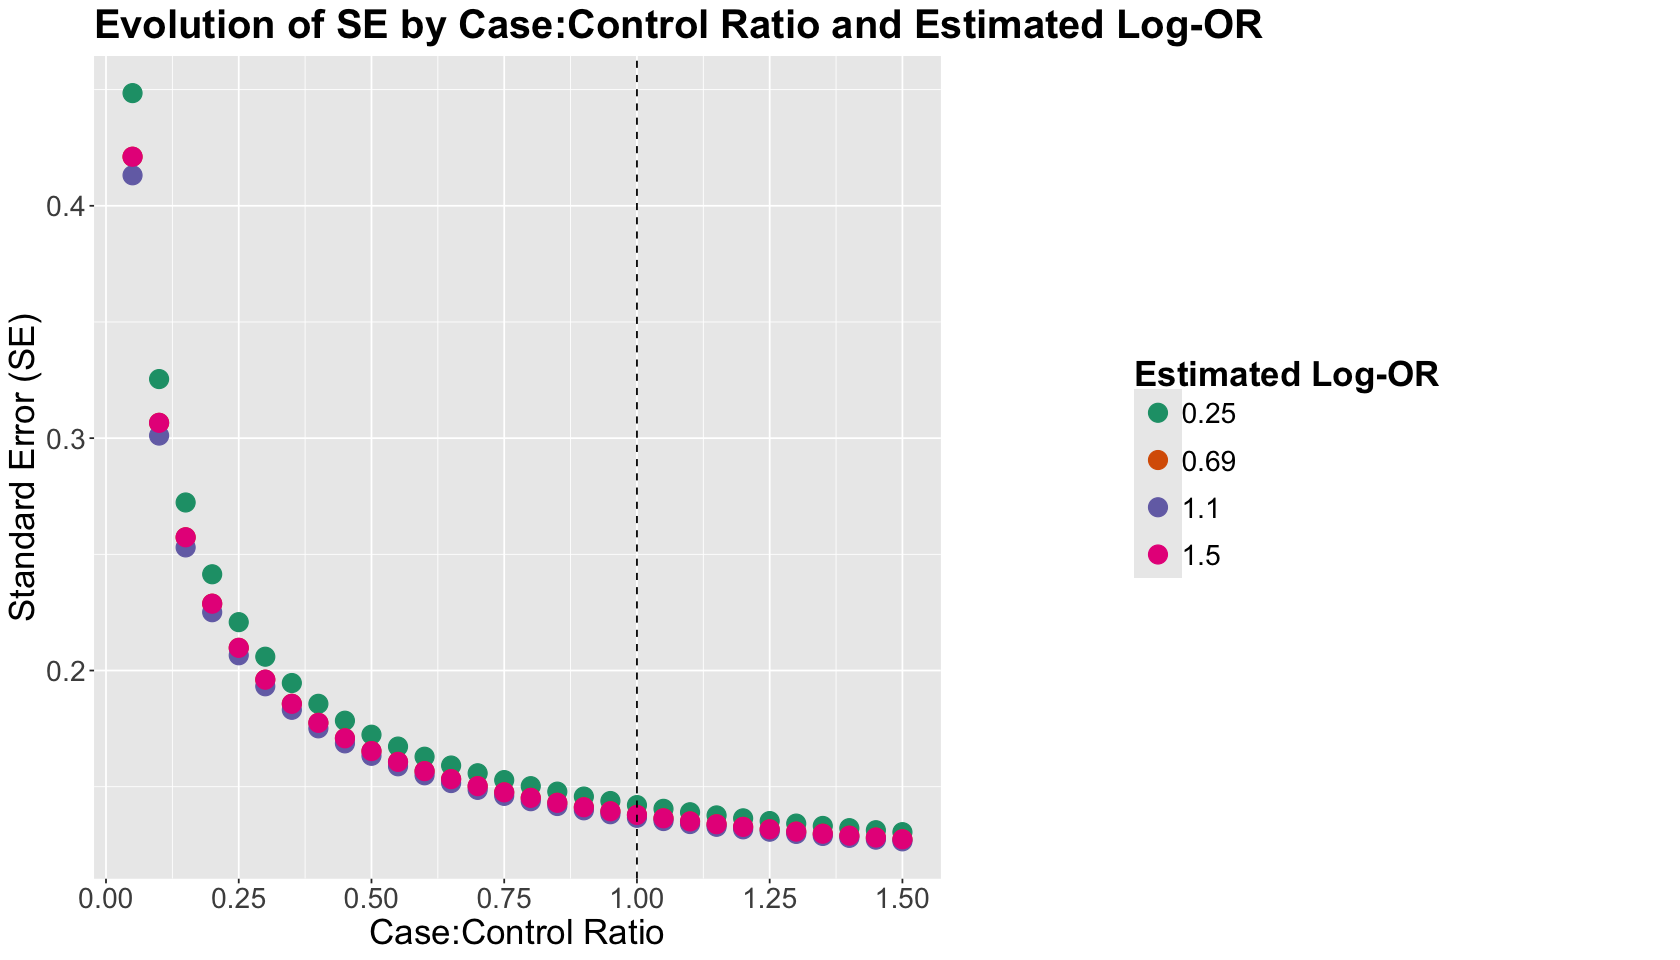

In [36]:
CC_power_analysis

```{admonition} What is the main takeaway from this plot?
:class: hint
According to the SE behaviour, in populations where the event $Y = 1$ is rare, we get a **more precise** estimate of the $\text{log-OR}$ when we oversample cases and undersample controls. This is even more beneficial in situations where the estimated $\text{log-OR}$ is low (as shown in our colour scale). Ideally, we might keep the $\text{Case:Control ratio}$ in $1$ or slightly above in a CC scheme if $Y = 1$ is extremely rare.
```

## 6. Wrapping Up

- We have learned a new way to assess a given sampling scheme by relying on previously sampled data.
- This sampled data would allow building a **proxy ground truth** so we can run whole simulation studies for each sampling scheme. This **proxy ground truth** is assumed to be governed by a **population regression model**.
- Note there is a constant tool we use in our simulations: **adding random noise**.
- From the three sampling schemes we explored, CC can provide a boost in accuracy and precision.